In [11]:
import snap
import pickle
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib

### Load the adjacency matrix

In [58]:
f = open('./data/sensor_graph/adj_mx.pkl', 'rb')   # 'r' for reading; can be omitted
data = pickle.load(f)         # load file content as mydict
f.close()

### Plot to visualize

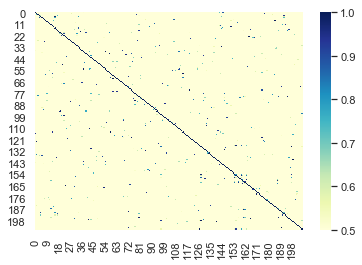

In [59]:
ax = sns.heatmap(data[2], vmin=0.5, vmax=1, cmap="YlGnBu")
plt.show()

In [70]:
data[1]

{'716328': 33,
 '716331': 15,
 '716337': 17,
 '716339': 12,
 '716554': 53,
 '716571': 90,
 '716939': 174,
 '716941': 23,
 '716942': 124,
 '716943': 165,
 '716949': 170,
 '716951': 134,
 '716953': 133,
 '716955': 56,
 '716956': 49,
 '716958': 139,
 '716960': 25,
 '716968': 112,
 '717099': 110,
 '717445': 5,
 '717446': 4,
 '717447': 3,
 '717450': 191,
 '717452': 192,
 '717453': 193,
 '717456': 195,
 '717458': 187,
 '717459': 188,
 '717460': 161,
 '717461': 160,
 '717462': 163,
 '717463': 162,
 '717465': 157,
 '717466': 159,
 '717468': 155,
 '717469': 154,
 '717472': 127,
 '717473': 128,
 '717480': 97,
 '717481': 96,
 '717483': 94,
 '717486': 98,
 '717488': 103,
 '717489': 102,
 '717490': 70,
 '717491': 71,
 '717492': 72,
 '717493': 73,
 '717495': 52,
 '717497': 69,
 '717498': 75,
 '717499': 76,
 '717502': 146,
 '717504': 148,
 '717508': 150,
 '717510': 180,
 '717513': 181,
 '717570': 118,
 '717571': 117,
 '717572': 116,
 '717573': 115,
 '717576': 114,
 '717578': 24,
 '717580': 169,
 '717

### However, the edgelist does not contain self-loops
Set the diagonal entries to be 0

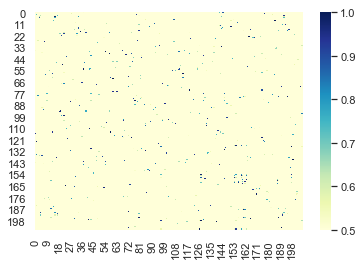

In [60]:
for i in range(data[2].shape[0]):
    data[2][i, i] = 0
ax = sns.heatmap(data[2], vmin=0.5, vmax=1, cmap="YlGnBu")
plt.show()

### Produce edge list from the weighted matrix
Also, notice that node 26 is missing from the weight and matrix file.

In [72]:
data[2][26,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [61]:
len(np.where(data[2]!=0.0)[0])

1515

In [73]:
nonZeroEleInd = np.where(data[2]!=0.0)
with open('METR-LA.txt', 'w') as f:
    for index in range(len(nonZeroEleInd[0])):
        x = nonZeroEleInd[0][index]
        y = nonZeroEleInd[1][index]
        f.write('{} {} {}\n'.format(x, y, data[2][x, y]))

In [74]:
a = list(set(nonZeroEleInd[0]).union(set(nonZeroEleInd[1])))
sum(xrange(a[0],a[-1]+1)) - sum(a)

26

### Try *node2vec*
Before any operation, we need to know that node 26 does not have a link with anybody: it is too far away from any other node. So somehow in the **main.py** we need to learn the node embedding for that node. By adding one more node in the network.<br>
What I did here is to add something to the **main.py** file.<br><br>
The adjustment is *at Line 72, add **```G.add_node(26)```** *.<br>

Then there are some problems with the argument input part, located in **parse_args()**. We should change **--walk-length** **--num-walks** **--window-size**      to      **--walk_length** **--num_walks** **--window_size**.

Then in **Terminal**, do these:
+ activate Python2 environment
+ python main.py --input METR-LA.txt --output nodeVec-LA.txt --dimensions * --walk_length * --num_walks * --window_size * --workers 4 --weighted --directed

### Load the *node2vec* and see how it works

In [2]:
with open('nodeVec-LA.txt', 'r') as f:
    data = f.readlines()

In [3]:
raw = []
for i in range(len(data)):
    if i > 0:
        line = [float(item) for item in data[i].strip().split(' ')]
        raw.append(line)

In [4]:
n2vecMatrix = np.array(raw)

#### Remember the first column is node id
This is demostrated below. Notice we specified **128** but what is given is vectors of length **129**.

In [5]:
n2vecMatrix.shape

(207, 31)

In [6]:
n2vecMatrix = n2vecMatrix[n2vecMatrix[:, 0].argsort()]

In [7]:
n2vecMatrix = n2vecMatrix[:,1:]
print n2vecMatrix.shape

(207, 30)


#### Save the result to a new file

In [8]:
np.savetxt('n2v-LA.txt', n2vecMatrix)

In [9]:
x = np.loadtxt('n2v-LA.txt')

In [10]:
x.shape

(207, 30)

### Now we've learned the node embeddings!

### Do a k-means clustering and plotting
Well, that does not give much information.

In [169]:
group = KMeans(n_clusters=3, random_state=0).fit_predict(n2vecMatrix)

In [170]:
latLon = './data/sensor_graph/graph_sensor_locations.csv'
locations = pd.read_csv(latLon)

In [171]:
locations.head()

,index,sensor_id,latitude,longitude
0,0,773869,34.15497,-118.31829
1,1,767541,34.11621,-118.23799
2,2,767542,34.11641,-118.23819
3,3,717447,34.07248,-118.26772
4,4,717446,34.07142,-118.26572


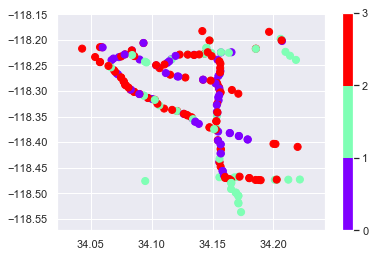

In [172]:
fig, ax = plt.subplots()
cmap = plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,4,1), cmap.N)
PCM = ax.scatter(locations['latitude'], locations['longitude'], s = 50, c=group, cmap = cmap, norm=norm)
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
# for i, txt in enumerate(name):
#     ax.annotate(txt, (vis_x[i], vis_y[i]))
plt.colorbar(PCM, ax = ax, ticks=np.linspace(0,3,4))#, boundaries=np.linspace(0,8,9))
plt.show()

## Read file from prediction
The ```python run_demo.py``` only took 2 minutes on EC2.

In [12]:
data = np.load('dcrnn_predictions.npz')

In [18]:
assert data['predictions'].shape == data['groundtruth'].shape

In [19]:
print(data['predictions'].shape)

(12, 6850, 207)


In [21]:
np.sum(np.absolute(data['predictions']-data['groundtruth'])) / (data['predictions'].shape[0] * data['predictions'].shape[1] * data['predictions'].shape[2])

9.611019978099439